# PC Algorithm

## Library imports

In [37]:
# Install statements

# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [1]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


## Data Preprocessing

In [2]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Datasets/Dataset_Coeff_Estimation.csv')

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,-0.21712,-1.18084,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,-0.71126,-0.21575,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,-1.37983,0.40148,6,3,0
18-24,0,Masters degree,34,34,46,47,46,-1.37983,-1.18084,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,-0.21712,-0.21575,6,3,0
65+,0,Left school at 18,29,38,35,55,52,-1.37983,-1.54858,6,0,0


In [3]:
# Apply an ordering to the ordinal drugs labels 

# We do this instead of simply transforming the labels to numeric 
#because we don't think that the intervals would correctly represent the data in that case

df$Caffeine <- ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6"))
df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))

# Age and Education have a certain ordinal ordering which we will make use of:

df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [4]:
# Inspecting the datatypes present in the dataframe

print("Train dataset specifications:")
str(df)

[1] "Train dataset specifications:"
'data.frame':	1885 obs. of  13 variables:
 $ Age              : Ord.factor w/ 6 levels "18-24"<"25-34"<..: 3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : int  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : Ord.factor w/ 9 levels "Left school before 16"<..: 6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : num  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : num  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : num  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : num  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : num  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  -0.217 -0.711 -1.38 -1.38 -0.217 ...
 $ Sensation_seeking: num  -1.181 -0.216 0.401 -1.181 -0.216 ...
 $ Caffeine         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 4 1 1 

In [5]:
# We need our numerical data as doubles in order for the algorithm to accept them

df$Gender <- as.double(df$Gender) 
df$Nscore <- as.double(df$Nscore) 
df$Escore <- as.double(df$Escore) 
df$Oscore <- as.double(df$Oscore) 
df$Ascore <- as.double(df$Ascore) 
df$Cscore <- as.double(df$Cscore) 

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,-0.21712,-1.18084,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,-0.71126,-0.21575,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,-1.37983,0.40148,6,3,0
18-24,0,Masters degree,34,34,46,47,46,-1.37983,-1.18084,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,-0.21712,-0.21575,6,3,0
65+,0,Left school at 18,29,38,35,55,52,-1.37983,-1.54858,6,0,0


In [6]:
# Inspecting the datatypes present in the dataframe

print("Train dataset specifications:")
str(df)

[1] "Train dataset specifications:"
'data.frame':	1885 obs. of  13 variables:
 $ Age              : Ord.factor w/ 6 levels "18-24"<"25-34"<..: 3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : num  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : Ord.factor w/ 9 levels "Left school before 16"<..: 6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : num  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : num  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : num  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : num  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : num  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  -0.217 -0.711 -1.38 -1.38 -0.217 ...
 $ Sensation_seeking: num  -1.181 -0.216 0.401 -1.181 -0.216 ...
 $ Caffeine         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 4 1 1 

## Model creation

Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Nscore -> Escore <- Sensation_seeking is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Gender -> Nscore <- Escore is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Gender -> Sensation_seeking <- Escore is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Cscore -> Gender <- Sensation_seeking is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Cscore -> Escore <- Sensation_see


  Bayesian network learned via Constraint-based methods

  model:
    [partially directed graph]
  nodes:                                 13 
  arcs:                                  17 
    undirected arcs:                     4 
    directed arcs:                       13 
  average markov blanket size:           3.69 
  average neighbourhood size:            2.62 
  average branching factor:              1.00 

  learning algorithm:                    PC (Stable) 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  758 


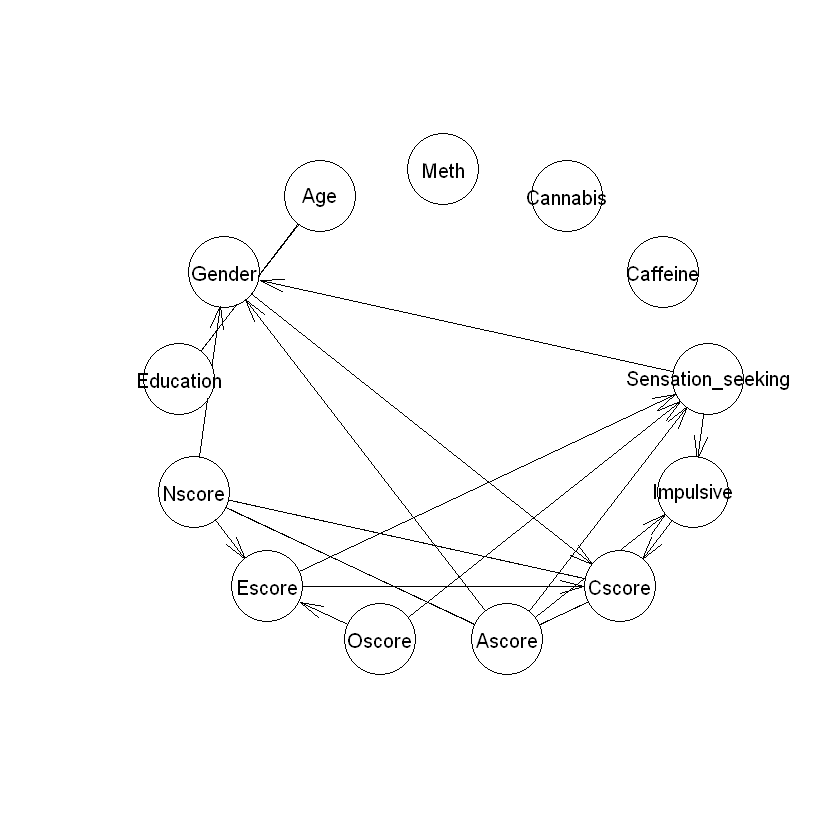

In [7]:
# The independence-test that is used is the "Mutual Information test"  since it is the only (implemented) test 
# that supports hybrid Bayesian networks

no_blacklist_network <- pc.stable(df,undirected=FALSE,alpha=0.05,test="mi-cg")
plot(no_blacklist_network)
no_blacklist_network

# As we can observe from the results there are undirected edges which can occur 
# because some arc directions are impossible to learn just from data due to score equivalence 

# Without blacklisted relations, there are some things here that are looking a bit off 
# E.g. Nothing should be able to influence Age or gender


  Bayesian network learned via Constraint-based methods

  model:
   [Age][Gender][Escore][Oscore][Caffeine][Cannabis][Meth][Education|Age]
   [Nscore|Gender][Ascore|Gender][Cscore|Gender][Impulsive|Ascore:Cscore]
   [Sensation_seeking|Gender:Escore:Oscore:Ascore:Impulsive]
  nodes:                                 13 
  arcs:                                  11 
    undirected arcs:                     0 
    directed arcs:                       11 
  average markov blanket size:           3.08 
  average neighbourhood size:            1.69 
  average branching factor:              0.85 

  learning algorithm:                    PC (Stable) 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  316 


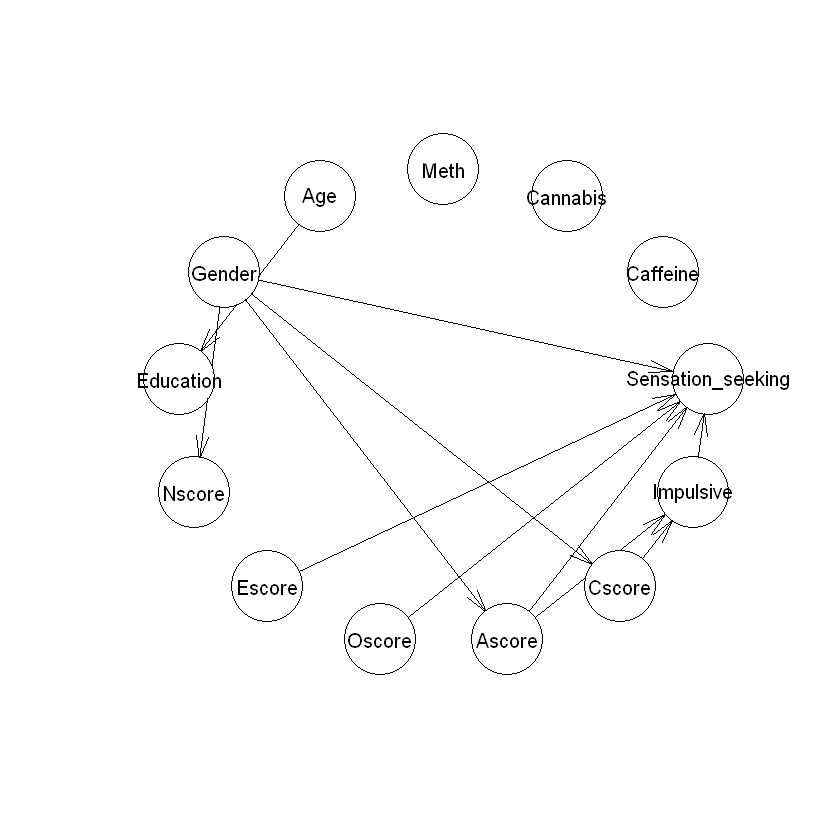

In [45]:
# If we make the same assumptions about our data as done in assignment 1 we obtain the following blacklist:

blacklist <- data.frame(
  "from" = c(
    "Gender",
    "Age",
    rep("Escore",6), #1
    rep("Oscore",6), #2
    rep("Ascore",6), #3
    rep("Cscore",6), #4
    rep("Nscore",6), #5
    rep("Sensation_seeking",8), #6
    rep("Impulsive",7), #7
    rep("Education",9), #8
    rep("Caffeine",9), #9
    rep("Cannabis",9), #10
    rep("Meth",9) #11
    
  ),
  "to" = c(
    "Age",
    "Gender",
    "Oscore", "Ascore", "Cscore","Nscore", "Age", "Gender", #Escore
    "Escore", "Ascore", "Cscore","Nscore", "Age", "Gender", #Oscore
    "Escore","Oscore","Cscore","Nscore", "Age", "Gender", #Ascore
    "Escore","Oscore","Ascore","Nscore", "Age", "Gender", #Cscore
    "Oscore","Ascore","Cscore","Escore", "Age", "Gender", #Nscore
    "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Impulsive", #Sensation_seeking
    "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", #Impulsive
    "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", #Education
    "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", #Caffeine
    "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", #Cannabis
    "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive" #Meth
  ))

# If we now apply the created blacklist from above we get the following learned network structure

a1_blacklist_network <- pc.stable(df, blacklist = blacklist,test="mi-cg")
plot(a1_blacklist_network)
a1_blacklist_network

# Also note that the network seems to contain no directed edges anymore 
# meaning that it is able to correctly estimate all directions

## Parameter Tuning

### Alpha Parameter

Alpha is the cutoff for the conditional independence test

### Max.sx Parameter

	
The maximum allowed size of the conditioning sets used in conditional independence tests. 

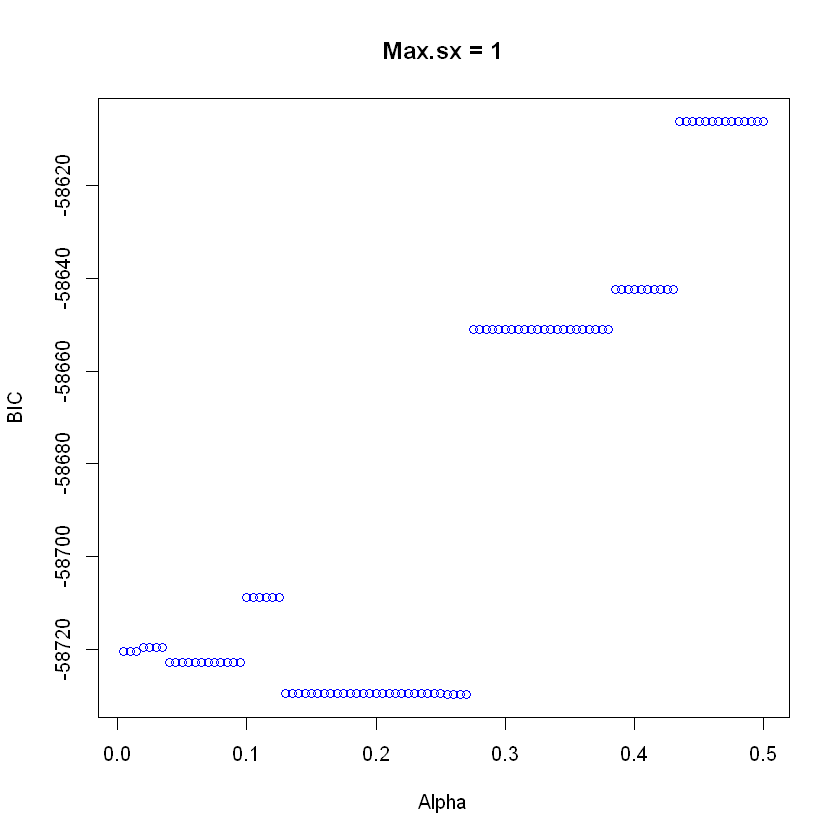

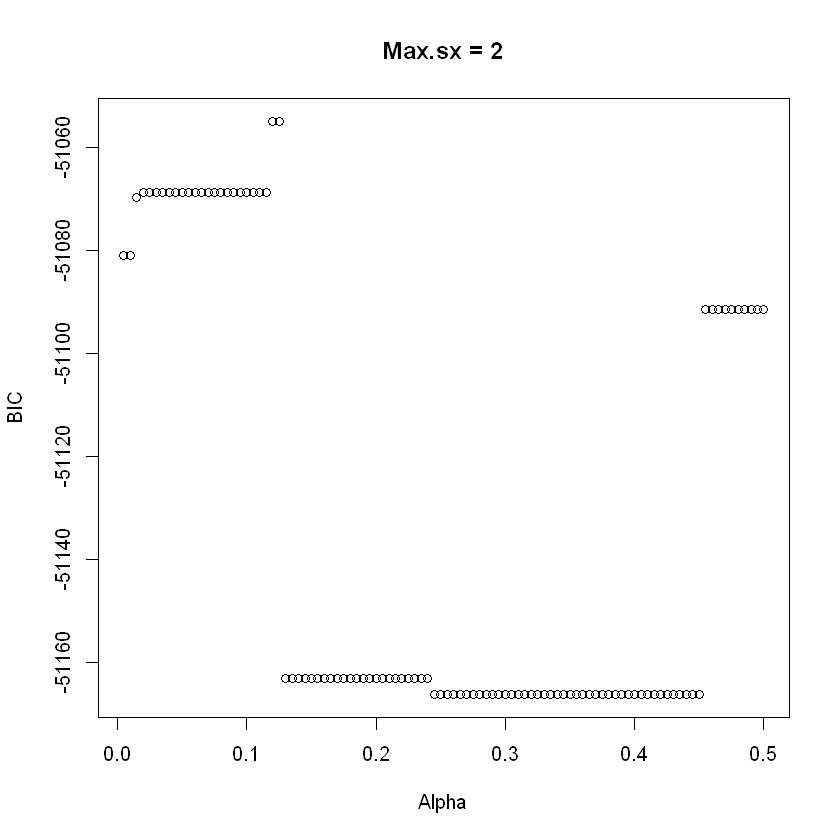

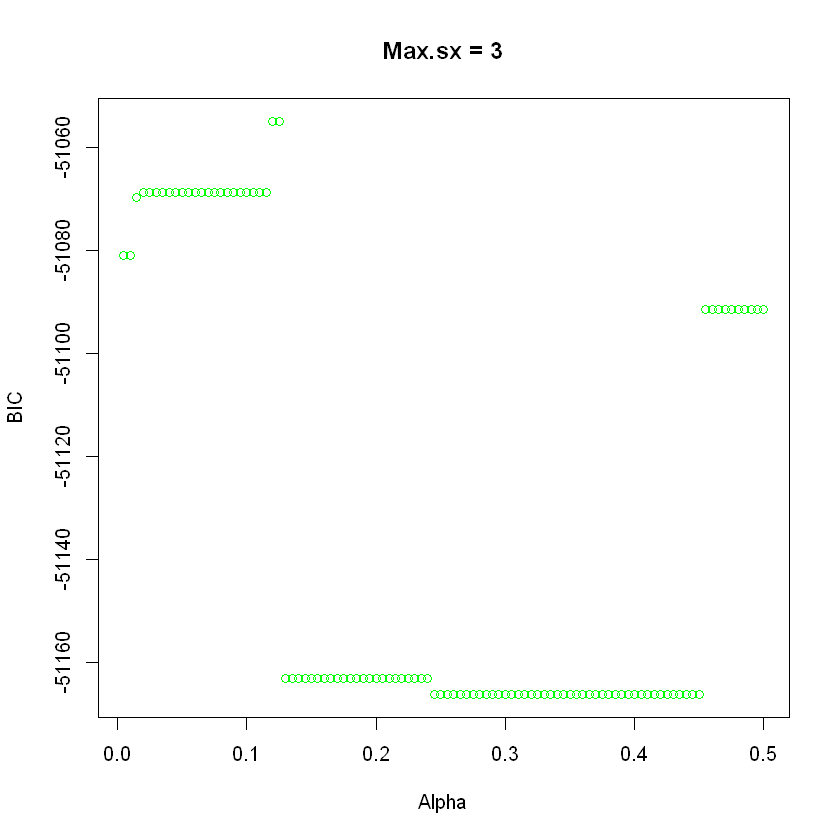

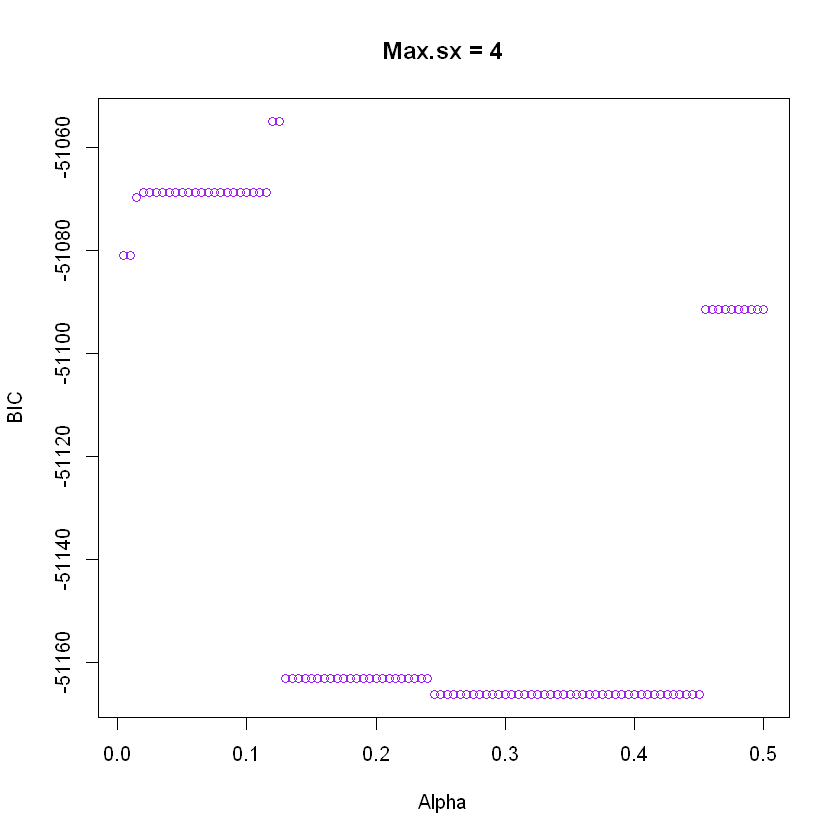

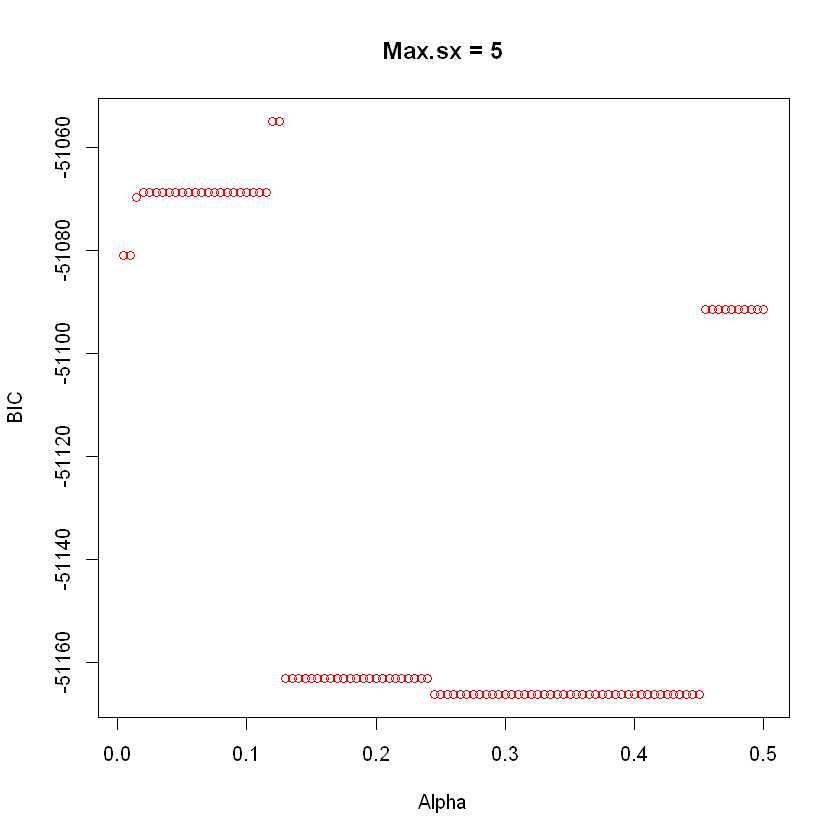

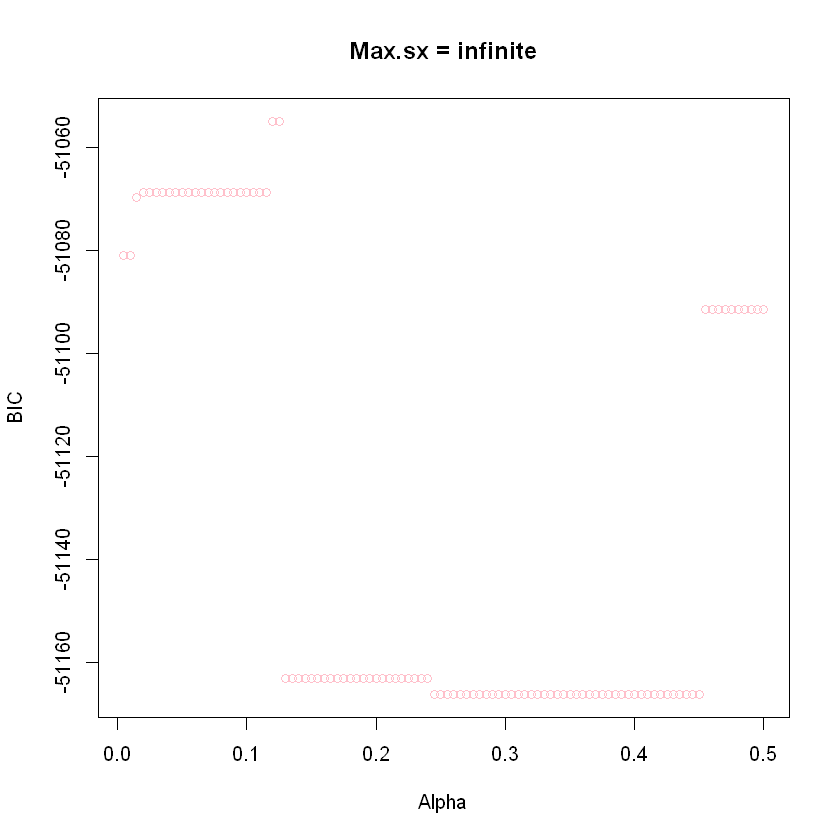

In [46]:
scores1 <- vector()
for(i in seq(0.005, 0.5, 0.005)){
    scores1 <- c(scores1, score(pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=i,test="mi-cg",max.sx=1), df))}
    
plot(seq(0.005, 0.5, 0.005),scores1,col="blue",xlab="Alpha",ylab="BIC",main="Max.sx = 1")
    
scores2 <- vector()
for(i in seq(0.005, 0.5, 0.005)){
    scores2 <- c(scores2, score(pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=i,test="mi-cg",max.sx=2), df))}

plot(seq(0.005, 0.5, 0.005),scores2,col="black",xlab="Alpha",ylab="BIC",main="Max.sx = 2")
    
scores3 <- vector()
for(i in seq(0.005, 0.5, 0.005)){
    scores3 <- c(scores3, score(pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=i,test="mi-cg",max.sx=3), df))}

plot(seq(0.005, 0.5, 0.005),scores3,col="green",xlab="Alpha",ylab="BIC",main="Max.sx = 3")
    
scores4 <- vector()
for(i in seq(0.005, 0.5, 0.005)){
    scores4 <- c(scores4, score(pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=i,test="mi-cg",max.sx=4), df))}

plot(seq(0.005, 0.5, 0.005),scores4,col="purple",xlab="Alpha",ylab="BIC",main="Max.sx = 4") 
    
scores5 <- vector()
for(i in seq(0.005, 0.5, 0.005)){
    scores5 <- c(scores5, score(pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=i,test="mi-cg",max.sx=5), df))}
    
plot(seq(0.005, 0.5, 0.005),scores5,col="red",xlab="Alpha",ylab="BIC",main="Max.sx = 5")

scoresinf <- vector()
for(i in seq(0.005, 0.5, 0.005)){
    scoresinf <- c(scoresinf, score(pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=i,test="mi-cg"), df))}
    
plot(seq(0.005, 0.5, 0.005),scoresinf,col="pink",xlab="Alpha",ylab="BIC",main="Max.sx = infinite")

## Score testing / Model comparison

In [47]:
print("Best achieved BIC-score and corresponding Alpha value for max.sx 1")
max(scores1)
best_alpha1 = order(scores1,decreasing=T)[1] * 0.005 + 0.005
print(best_alpha1)

print("Best achieved BIC-score and corresponding Alpha value for max.sx 2")
max(scores2)
best_alpha2 = order(scores2,decreasing=T)[1] * 0.005 + 0.005
print(best_alpha2)

print("Best achieved BIC-score and corresponding Alpha value for max.sx 3")
max(scores3)
best_alpha3 = order(scores3,decreasing=T)[1] * 0.005 + 0.005
print(best_alpha3)

print("Best achieved BIC-score and corresponding Alpha value for max.sx 4")
max(scores4)
best_alpha4 = order(scores4,decreasing=T)[1] * 0.005 + 0.005
print(best_alpha4)

print("Best achieved BIC-score and corresponding Alpha value for max.sx 5")
max(scores5)
best_alpha5 = order(scores5,decreasing=T)[1] * 0.005 + 0.005
print(best_alpha5)

print("Best achieved BIC-score and corresponding Alpha value for max.sx infinite")
max(scoresinf)
best_alphainf = order(scoresinf,decreasing=T)[1] * 0.005 + 0.005
print(best_alphainf)

[1] "Best achieved BIC-score and corresponding Alpha value for max.sx 1"


[1] -58606.2

[1] 0.44
[1] "Best achieved BIC-score and corresponding Alpha value for max.sx 2"


[1] -51054.94

[1] 0.125
[1] "Best achieved BIC-score and corresponding Alpha value for max.sx 3"


[1] -51054.94

[1] 0.125
[1] "Best achieved BIC-score and corresponding Alpha value for max.sx 4"


[1] -51054.94

[1] 0.125
[1] "Best achieved BIC-score and corresponding Alpha value for max.sx 5"


[1] -51054.94

[1] 0.125
[1] "Best achieved BIC-score and corresponding Alpha value for max.sx infinite"


[1] -51054.94

[1] 0.125


## Optimal graph (finetuned parameters)


  Bayesian network learned via Constraint-based methods

  model:
   [Age][Gender][Escore][Caffeine][Cannabis][Meth][Education|Age][Nscore|Gender]
   [Oscore|Gender][Ascore|Gender][Cscore|Gender][Impulsive|Ascore:Cscore]
   [Sensation_seeking|Gender:Escore:Oscore:Ascore:Impulsive]
  nodes:                                 13 
  arcs:                                  12 
    undirected arcs:                     0 
    directed arcs:                       12 
  average markov blanket size:           3.08 
  average neighbourhood size:            1.85 
  average branching factor:              0.92 

  learning algorithm:                    PC (Stable) 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.125 
  tests used in the learning procedure:  359 


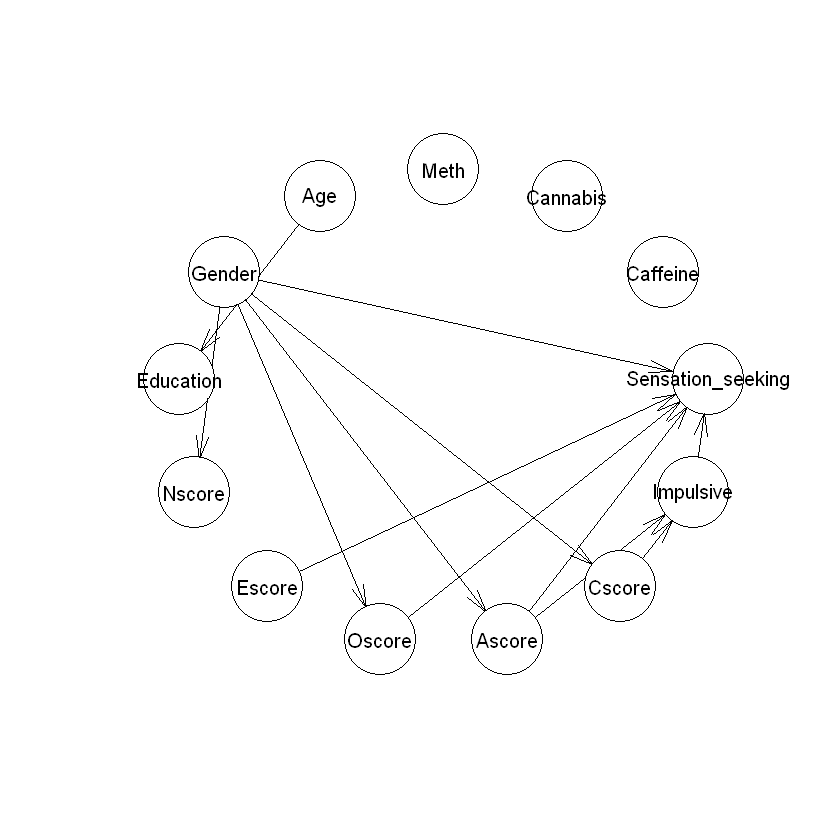

In [51]:
finetuned_network <- pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=0.125,test="mi-cg")
finetuned_network
plot(finetuned_network)

## Path Coefficients

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.


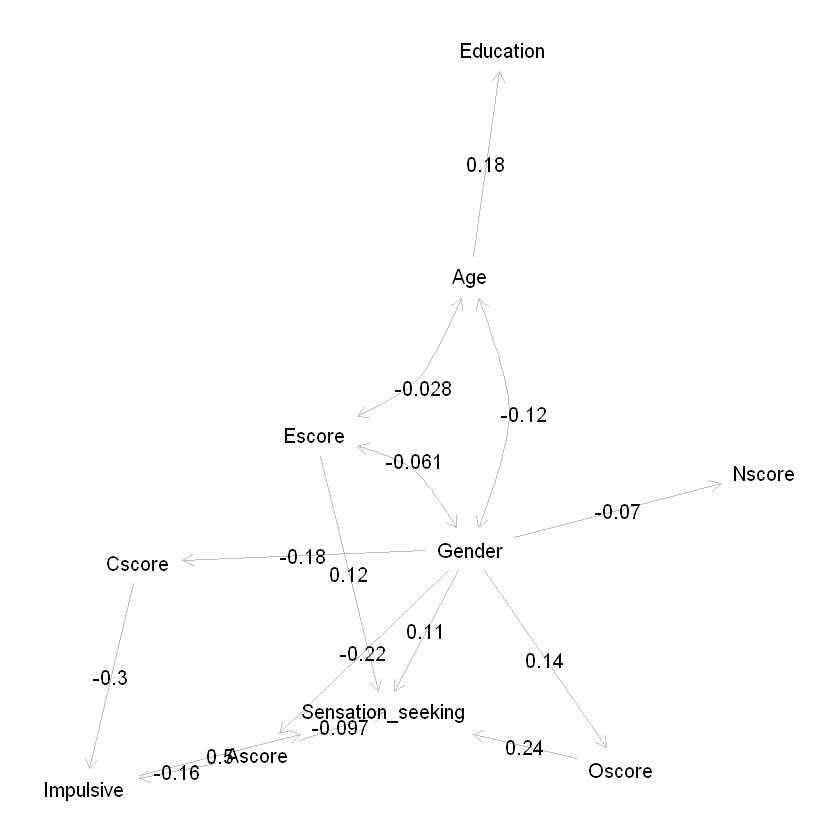

In [54]:
# This dagitty formatted string is obtained through a seperate Python parser (see the readme)
finetuned_network = "dag { Age Gender Escore Caffeine Cannabis Meth Education Nscore Oscore Ascore Cscore Impulsive Sensation_seeking Age -> Education Gender -> Nscore Gender -> Oscore Gender -> Ascore Gender -> Cscore Ascore -> Impulsive Cscore -> Impulsive Gender -> Sensation_seeking Escore -> Sensation_seeking Oscore -> Sensation_seeking Ascore -> Sensation_seeking Impulsive -> Sensation_seeking }"
g1 = dagitty(finetuned_network)

# Create correlation matrix using lavaan to calculate the path coefficients
M <- lavCor(df)
model1 <- toString(g1,"lavaan")
msem <- lavaan(model1, sample.cov=M, sample.nobs=nrow(df),estimator="ML", auto.var=TRUE, fixed.x = FALSE)
fg <- lavaanToGraph(msem, digits = 2)
plot(fg, show.coefficients = TRUE)